<a href="https://colab.research.google.com/github/tanisha-jainn/Toolhouse_FP/blob/main/Toolhouse_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
# theme
sns.set_theme(style="whitegrid")

options = ['Use of Specific Images',
                                              'Display in User\'s Language',
                                              'Page Layout Design',
                                              'Personalized Offers']

percentages = [0.2, 0.6, 0.4, 0.45]

randomized_options = np.random.choice(['Use of Specific Images',
                                              'Display in User\'s Language',
                                              'Page Layout Design',
                                              'Personalized Offers'], 1000)

conversion_rates = []

for opt in randomized_options:

   index = options.index(opt)

   rand_between_0_and_1 = np.random.random()

   if rand_between_0_and_1 < percentages[index]:

    conversion_rates.append(1)

   else:

    conversion_rates.append(0)

# placeholder data
data = pd.DataFrame({
    'personalization_type': randomized_options,
    'conversion': conversion_rates
})

data['personalization_type'] = pd.Categorical(data['personalization_type'], categories=options, ordered=True)


In [ ]:
# convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['personalization_type'])



X = data.drop('conversion', axis=1)
y = data['conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model training
model = RandomForestClassifier(n_estimators=16, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=16, random_state=42)

In [ ]:
# predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

importances = model.feature_importances_
print(importances)
feature_names = ['Location Based Images', 'Language Adaptation', 'Layout Design', 'Aged Based Personalization']
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Accuracy: 0.99
ROC AUC Score: 0.99
[0.07763206 0.08209609 0.74637115 0.09390071]


<ipython-input-70-552322009587>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, legend=False, palette=palette, edgecolor='black')


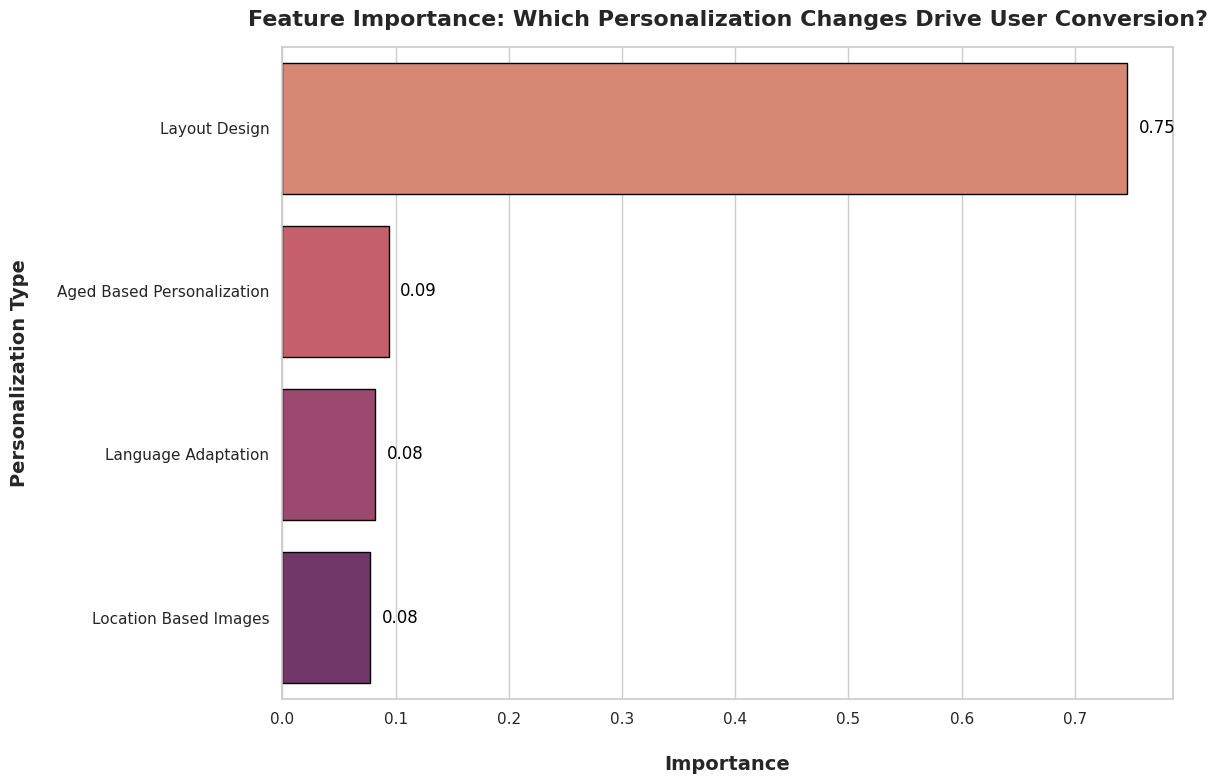

In [ ]:
# plotting feature importance
plt.figure(figsize=(12, 8))
palette = sns.color_palette("flare", len(feature_importance_df))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, legend=False, palette=palette, edgecolor='black')

plt.xlabel('Importance', fontsize=14, weight='bold', labelpad=20)
plt.ylabel('Personalization Type', fontsize=14, weight='bold', labelpad=20)
plt.title('Feature Importance: Which Personalization Changes Drive User Conversion?', fontsize=16, weight='bold', pad=15)

max_importance_value = feature_importance_df['Importance'].max()
plt.xlim(0, max_importance_value + 0.04)

# bar annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value + 0.01, index, f'{value:.2f}', color='black', va='center', fontsize=12)

# gridlines
plt.grid(True, which='minor', linestyle='--', linewidth=0.3)
plt.tight_layout()
plt.show()